# Bonds Portfolio

http://www.buschinvestments.com/Types-of-Bonds.c71.htm

Treasury Securities  
Municipal Bonds  
Corporate Bonds  
Zero-Coupon Bonds  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from tabulate import tabulate
from scipy.stats import norm
import math 

import warnings
warnings.filterwarnings("ignore")

# yfinance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbols = ['SPY','FIHBX','FBTAX','DBC']
start = '2014-01-01'
end = '2019-01-01'
title = "Bonds Portfolio"

# Read data 
dataset = yf.download(symbols,start,end)['Adj Close']

# View Columns
dataset.head()

[*********************100%***********************]  4 of 4 completed


,DBC,FBTAX,FIHBX,SPY
Date,,,,
2014-01-02,24.572100,16.094238,6.968676,160.925400
2014-01-03,24.416641,16.017763,6.975503,160.898972
2014-01-06,24.445789,15.813823,6.975503,160.432693
2014-01-07,24.426357,16.068747,6.989153,161.418060
2014-01-08,24.193171,16.374655,6.989153,161.453278


In [3]:
dataset.tail()

,DBC,FBTAX,FIHBX,SPY
Date,,,,
2018-12-24,14.163118,20.312393,8.344463,227.638824
2018-12-26,14.478073,21.567284,8.326165,239.140244
2018-12-27,14.340280,21.632837,8.335313,240.976212
2018-12-28,14.222172,21.632837,8.371911,240.665375
2018-12-31,14.261541,22.101082,8.426186,242.773315


### Starting Cash with 100k to invest in Bonds

In [4]:
Cash = 100000
print('Percentage of invest:')
percent_invest = [0.25, 0.25, 0.25, 0.25]
for i, x in zip(dataset.columns, percent_invest):
    cost = x * Cash
    print('{}: {}'.format(i, cost))

Percentage of invest:
DBC: 25000.0
FBTAX: 25000.0
FIHBX: 25000.0
SPY: 25000.0


In [5]:
print('Number of Shares:')
percent_invest = [0.25, 0.25, 0.25, 0.25]
for i, x, y in zip(dataset.columns, percent_invest, dataset.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    print('{}: {}'.format(i, shares))

Number of Shares:
DBC: 1017
FBTAX: 1553
FIHBX: 3587
SPY: 155


In [6]:
print('Beginning Value:')
percent_invest = [0.25, 0.25, 0.25, 0.25]
for i, x, y in zip(dataset.columns, percent_invest, dataset.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    Begin_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Begin_Value))

Beginning Value:
DBC: $24989.83
FBTAX: $24994.35
FIHBX: $24996.64
SPY: $24943.44


In [7]:
print('Current Value:')
percent_invest = [0.25, 0.25, 0.25, 0.25]
for i, x, y, z in zip(dataset.columns, percent_invest, dataset.iloc[0], dataset.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    print('{}: ${}'.format(i, Current_Value))

Current Value:
DBC: $14503.99
FBTAX: $34322.98
FIHBX: $30224.73
SPY: $37629.86


In [8]:
result = []
for i, x, y, z in zip(dataset.columns, percent_invest, dataset.iloc[0], dataset.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    result.append(Current_Value)
print('Total Value: $%s' % round(sum(result),2))

Total Value: $116681.56


In [9]:
# Calculate Daily Returns
returns = dataset.pct_change()
returns = returns.dropna()

In [10]:
# Calculate mean returns
meanDailyReturns = returns.mean()
print(meanDailyReturns)

DBC     -0.000388
FBTAX    0.000403
FIHBX    0.000155
SPY      0.000362
dtype: float64


In [11]:
# Calculate std returns
stdDailyReturns = returns.std()
print(stdDailyReturns)

DBC      0.009496
FBTAX    0.017337
FIHBX    0.002734
SPY      0.008306
dtype: float64


In [12]:
# Define weights for the portfolio
weights = np.array([0.50, 0.10, 0.20, 0.20])

In [13]:
# Calculate the covariance matrix on daily returns
cov_matrix = (returns.cov())*250
print (cov_matrix)

            DBC     FBTAX     FIHBX       SPY
DBC    0.022544  0.005441  0.001920  0.006348
FBTAX  0.005441  0.075140  0.003101  0.023501
FIHBX  0.001920  0.003101  0.001869  0.002384
SPY    0.006348  0.023501  0.002384  0.017247


In [14]:
# Calculate expected portfolio performance
portReturn = np.sum(meanDailyReturns*weights)

In [15]:
# Print the portfolio return
print(portReturn)

-5.022475164538252e-05


In [16]:
# Create portfolio returns column
returns['Portfolio'] = returns.dot(weights)

In [17]:
returns.head()

,DBC,FBTAX,FIHBX,SPY,Portfolio
Date,,,,,
2014-01-03,-0.006327,-0.004752,0.000980,-0.000164,-0.003475
2014-01-06,0.001194,-0.012732,0.000000,-0.002898,-0.001256
2014-01-07,-0.000795,0.016120,0.001957,0.006142,0.002834
2014-01-08,-0.009547,0.019037,0.000000,0.000218,-0.002826
2014-01-09,-0.008032,0.047743,0.000000,0.000654,0.000889


In [18]:
returns.tail()

,DBC,FBTAX,FIHBX,SPY,Portfolio
Date,,,,,
2018-12-24,-0.011065,-0.010944,-0.003279,-0.026423,-0.012567
2018-12-26,0.022238,0.061780,-0.002193,0.050525,0.026963
2018-12-27,-0.009517,0.003039,0.001099,0.007677,-0.002700
2018-12-28,-0.008236,0.000000,0.004391,-0.001290,-0.003498
2018-12-31,0.002768,0.021645,0.006483,0.008759,0.006597


In [19]:
# Calculate cumulative returns
daily_cum_ret=(1+returns).cumprod()
print(daily_cum_ret.tail())

                 DBC     FBTAX     FIHBX       SPY  Portfolio
Date                                                         
2018-12-24  0.576390  1.262091  1.197425  1.414561   0.889783
2018-12-26  0.589208  1.340062  1.194799  1.486032   0.913774
2018-12-27  0.583600  1.344136  1.196111  1.497441   0.911307
2018-12-28  0.578794  1.344136  1.201363  1.495509   0.908120
2018-12-31  0.580396  1.373229  1.209152  1.508608   0.914110


In [20]:
# 99% confidence interval
# 0.01 empirical quantile of daily returns
var99 = round((returns['Portfolio']).quantile(0.01), 3)

In [21]:
print('Value at Risk (99% confidence)')
print(var99)

Value at Risk (99% confidence)
-0.018


In [22]:
# the percent value of the 5th quantile
print('Percent Value-at-Risk of the 5th quantile')
var_1_perc = round(np.quantile(var99, 0.01), 3)
print("{:.1f}%".format(-var_1_perc*100))

Percent Value-at-Risk of the 5th quantile
1.8%


In [23]:
print('Value-at-Risk of 99% for 100,000 investment')
print("${}".format(round(-var99 * 100000),2))

Value-at-Risk of 99% for 100,000 investment
$1800.0


In [24]:
# 95% confidence interval
# 0.05 empirical quantile of daily returns
var95 = round((returns['Portfolio']).quantile(0.05), 3)

In [25]:
print('Value at Risk (95% confidence)')
print(var95)

Value at Risk (95% confidence)
-0.011


In [26]:
print('Percent Value-at-Risk of the 5th quantile')
print("{:.1f}%".format(-var95*100))

Percent Value-at-Risk of the 5th quantile
1.1%


In [27]:
# VaR for 100,000 investment
print('Value-at-Risk of 99% for 100,000 investment')
var_100k = "${}".format(int(-var95 * 100000))
print("${}".format(int(-var95 * 100000)))

Value-at-Risk of 99% for 100,000 investment
$1100


In [28]:
mean = np.mean(returns['Portfolio'])
std_dev = np.std(returns['Portfolio'])

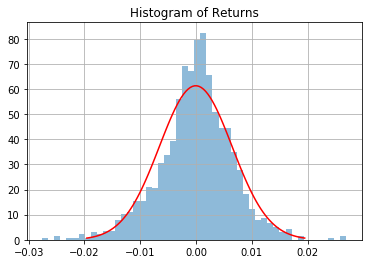

In [29]:
returns['Portfolio'].hist(bins=50, normed=True, histtype='stepfilled', alpha=0.5)
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
plt.plot(x, mlab.normpdf(x, mean, std_dev), "r")
plt.title('Histogram of Returns')
plt.show()

In [30]:
VaR_90 = norm.ppf(1-0.9, mean, std_dev)
VaR_95 = norm.ppf(1-0.95, mean, std_dev)
VaR_99 = norm.ppf(1-0.99, mean, std_dev)

In [31]:
print(tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers=['Confidence Level', 'Value at Risk']))

Confidence Level      Value at Risk
------------------  ---------------
90%                     -0.00839355
95%                     -0.0107588
99%                     -0.0151955


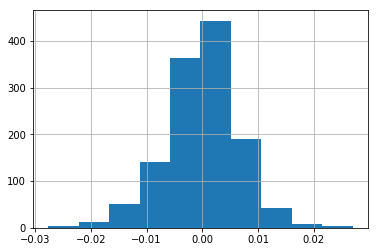

In [32]:
returns['Portfolio'].hist()
plt.show()

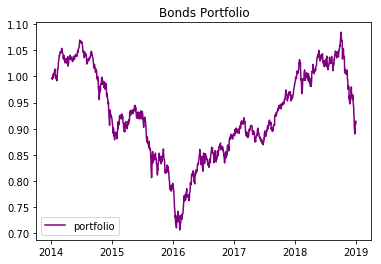

In [33]:
import matplotlib.dates

# Plot the portfolio cumulative returns only
fig, ax = plt.subplots()
ax.plot(daily_cum_ret.index, daily_cum_ret.Portfolio, color='purple', label="portfolio")
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
plt.title(title)
plt.legend()
plt.show()

In [34]:
# Print the mean
print("mean : ", returns['Portfolio'].mean()*100)

# Print the standard deviation
print("Std. dev: ", returns['Portfolio'].std()*100)

# Print the skewness
print("skew: ", returns['Portfolio'].skew())

# Print the kurtosis
print("kurt: ", returns['Portfolio'].kurtosis())

mean :  -0.005022475164538249
Std. dev:  0.651291924442618
skew:  -0.2260558811935371
kurt:  1.2996237688067493


In [35]:
# Calculate the standard deviation by taking the square root
port_standard_dev = np.sqrt(np.dot(weights.T, np.dot(weights, cov_matrix)))

# Print the results 
print(str(np.round(port_standard_dev, 4) * 100) + '%')

10.299999999999999%


In [36]:
# Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

# Print the result
print(str(np.round(port_variance, 4) * 100) + '%')

1.06%


In [37]:
# Calculate total return and annualized return from price data 
total_return = (returns['Portfolio'][-1] - returns['Portfolio'][0])

# Annualize the total return over 5 year 
annualized_return = ((1 + total_return)**(1/5))-1

In [38]:
# Calculate annualized volatility from the standard deviation
vol_port = returns['Portfolio'].std() * np.sqrt(250)

In [39]:
# Calculate the Sharpe ratio 
rf = 0.01
sharpe_ratio = ((annualized_return - rf) / vol_port)
print(sharpe_ratio)

-0.07762413406087283


In [40]:
# Create a downside return column with the negative returns only
target = 0
downside_returns = returns.loc[returns['Portfolio'] < target]

# Calculate expected return and std dev of downside
expected_return = returns['Portfolio'].mean()
down_stdev = downside_returns.std()

# Calculate the sortino ratio
rf = 0.01
sortino_ratio = (expected_return - rf)/down_stdev

# Print the results
print("Expected return: ", expected_return*100)
print('-' * 50)
print("Downside risk:")
print(down_stdev*100)
print('-' * 50)
print("Sortino ratio:")
print(sortino_ratio)

Expected return:  -0.005022475164538249
--------------------------------------------------
Downside risk:
DBC          0.717214
FBTAX        1.608918
FIHBX        0.269959
SPY          0.779532
Portfolio    0.459835
dtype: float64
--------------------------------------------------
Sortino ratio:
DBC         -1.401287
FBTAX       -0.624657
FIHBX       -3.722866
SPY         -1.289263
Portfolio   -2.185616
dtype: float64


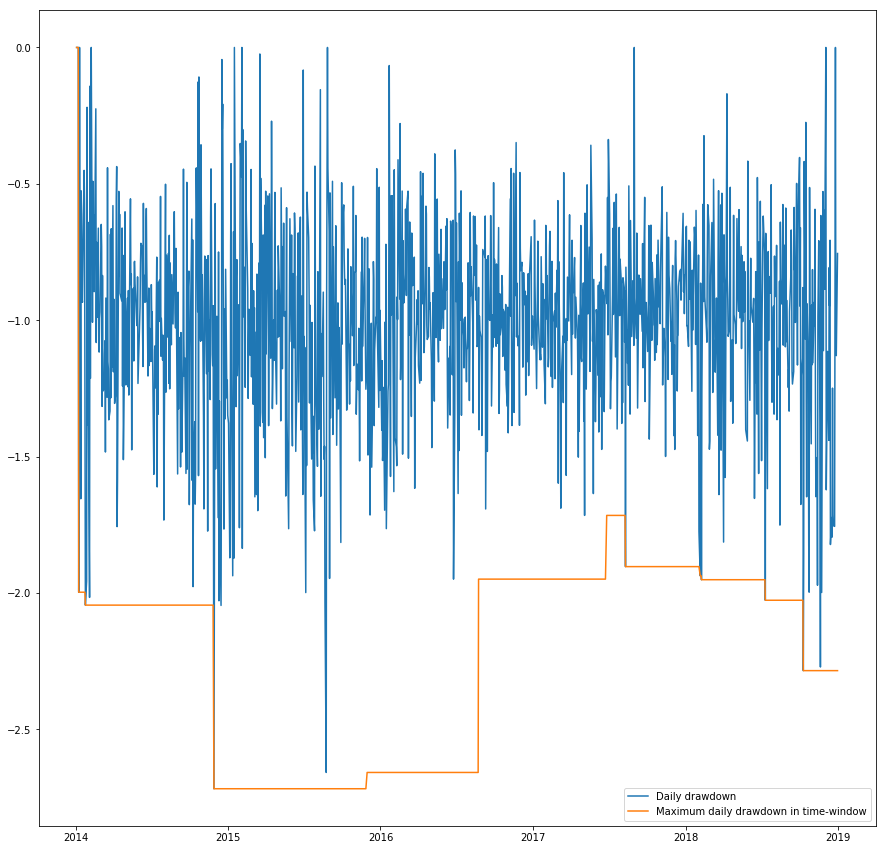

In [41]:
# Calculate the max value 
roll_max = returns['Portfolio'].rolling(center=False,min_periods=1,window=252).max()

# Calculate the daily draw-down relative to the max
daily_draw_down = returns['Portfolio']/roll_max - 1.0

# Calculate the minimum (negative) daily draw-down
max_daily_draw_down = daily_draw_down.rolling(center=False,min_periods=1,window=252).min()

# Plot the results
plt.figure(figsize=(15,15))
plt.plot(returns.index, daily_draw_down, label='Daily drawdown')
plt.plot(returns.index, max_daily_draw_down, label='Maximum daily drawdown in time-window')
plt.legend()
plt.show()

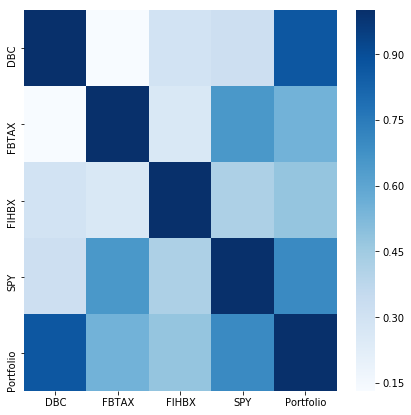

In [42]:
plt.figure(figsize=(7,7))
corr = returns.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Blues")

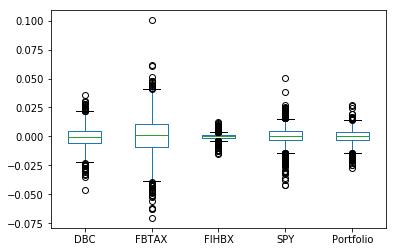

In [43]:
# Box plot
returns.plot(kind='box')

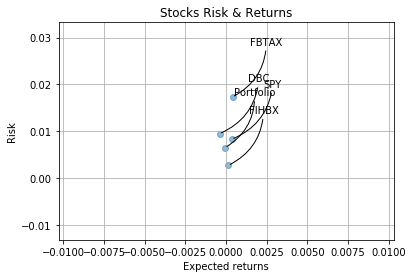

In [44]:
rets = returns.dropna()

plt.scatter(rets.mean(), rets.std(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

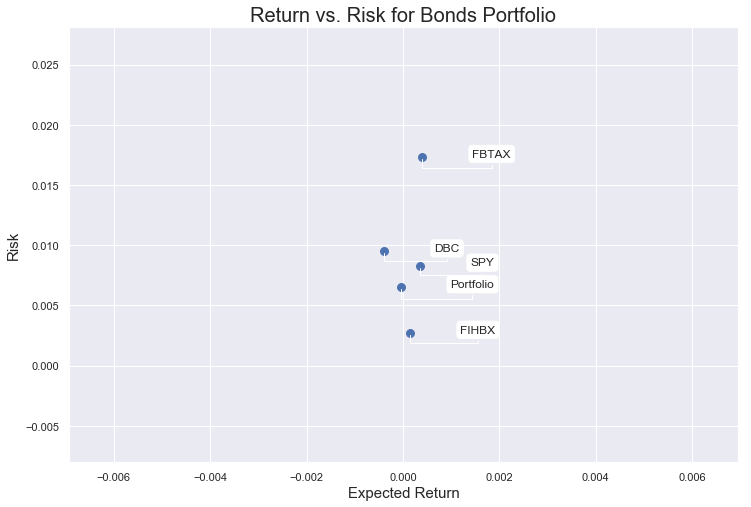

In [45]:
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for " + title, fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [46]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risk:")
print(rets.std())

Stock returns: 
DBC         -0.000388
FBTAX        0.000403
FIHBX        0.000155
SPY          0.000362
Portfolio   -0.000050
dtype: float64
--------------------------------------------------
Stock risk:
DBC          0.009496
FBTAX        0.017337
FIHBX        0.002734
SPY          0.008306
Portfolio    0.006513
dtype: float64


In [47]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
DBC,-0.000388,0.009496
Portfolio,-0.000050,0.006513
FIHBX,0.000155,0.002734
SPY,0.000362,0.008306
FBTAX,0.000403,0.017337


In [48]:
table.sort_values(by='Risk')

,Returns,Risk
FIHBX,0.000155,0.002734
Portfolio,-0.000050,0.006513
SPY,0.000362,0.008306
DBC,-0.000388,0.009496
FBTAX,0.000403,0.017337


In [49]:
rf = 0.01
table['Sharpe_Ratio'] = (table['Returns'] - rf) / table['Risk']
table

,Returns,Risk,Sharpe_Ratio
DBC,-0.000388,0.009496,-1.093885
FBTAX,0.000403,0.017337,-0.553582
FIHBX,0.000155,0.002734,-3.601055
SPY,0.000362,0.008306,-1.160409
Portfolio,-0.000050,0.006513,-1.543121
